In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Make a request to https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/

# Store the result in 'res' variable
res = requests.get(
    'https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/')
txt = res.text
status = res.status_code

print(txt)
# print the result

In [ ]:
# Make a request to https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/
page = requests.get(
    "https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/")

soup = BeautifulSoup(page.content, 'html.parser')

# Extract title of page
page_title = soup.title.text

# print the result
print(page_title)

Countries where Coronavirus has spread - Worldometer


In [ ]:
#create a dictionary and store the values
report={'COUNTRY':[],'CASES':[],'DEATHS':[],'REGION':[]}
l1=[]
l2=[]
l3=[]
l4=[]
for i in range(500):
  l2.append((soup.select('td')[4*i+1].text))
  l3.append((soup.select('td')[4*i+2].text))
  l4.append(soup.select('td')[4*i+3].text)
  if soup.select('td')[4*i].text=='Micronesia':
    l1.append(soup.select('td')[4*i].text)
    break;
  else:
    l1.append(soup.select('td')[4*i].text)
report['COUNTRY']=l1
report['CASES']=l2
report['DEATHS']=l3
report['REGION']=l4

#converting the dictionary into csv file
pd.DataFrame(report).to_csv('out.csv', index=False)

# CHECK out.csv
df = pd.read_csv('out.csv')
df


**Once the csv file is created,we will analyse the data present in it.**

In [ ]:
df = pd.read_csv('out.csv')
df

In [ ]:
#convert a string containing commas into an integer

def convert(s):
  c=1
  o=""
  for i in s:
    if i==',':
      continue
    o=o+i
    
  return int(o)

Countries where Coronavirus has spread - Worldometer 


                    DATA EXTRACTED             

 
TOTAL CASES AROUND THE GLOBE 123875548 


TOTAL DEATHS AROUND THE GLOBE 2728064 


TOTAL CASES AROUND THE GLOBE 123875548 


MAXIMUM  30521774  cases in  United States 


MINIMUM  1 cases in  Micronesia 


MAXIMUM  555314 deaths in  United States 


MINIMUM  0 deaths in  Timor-Leste 





 CASES:CONTINENTWISE


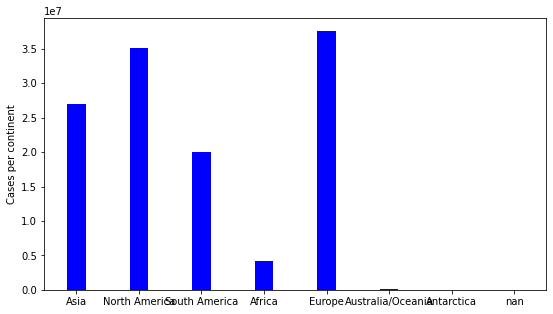

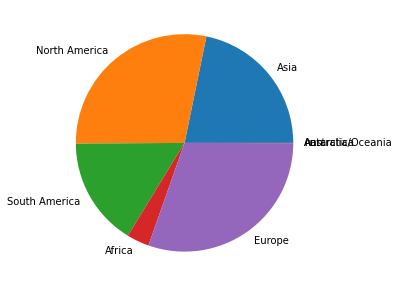




 DEATHS:CONTINENTWISE


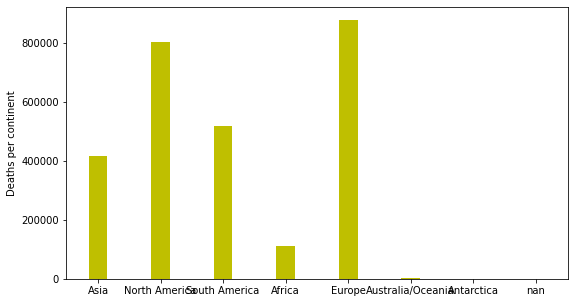

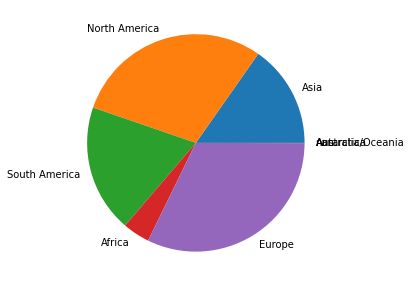

In [ ]:
total_cases=0
total_deaths=0
max_case_country=""
min_case_country=""
max_death_country=""
min_death_country=""
max_cases=0
min_cases=100000000000
max_deaths=0
min_deaths=10000000000
continent=['Asia','North America','South America','Africa','Europe','Australia/Oceania','Antarctica','nan']
continent_cases=[0,0,0,0,0,0,0,0]
continent_deaths=[0,0,0,0,0,0,0,0]

#iterating rowwise and extracting necessary information 

for index, row in df.iterrows():
  total_cases +=convert(row['CASES'])
  total_deaths +=convert(row['DEATHS'])

  if convert(row['CASES'])>max_cases:
    max_cases=convert(row['CASES'])
    max_case_country=row['COUNTRY']

  if convert(row['CASES'])<min_cases:
    min_cases=convert(row['CASES'])
    min_case_country=row['COUNTRY']

  if convert(row['DEATHS'])>max_deaths:
    max_deaths=convert(row['DEATHS'])
    max_death_country=row['COUNTRY']

  if convert(row['DEATHS'])<min_deaths:
    min_deaths=convert(row['DEATHS'])
    min_death_country=row['COUNTRY']
   
  try:
      continent_cases[continent.index(row['REGION'])]+=convert(row['CASES'])
      continent_deaths[continent.index(row['REGION'])]+=convert(row['DEATHS'])
  except:p=0


#Now lets print all the results
print(page_title,"\n\n")
print("                    DATA EXTRACTED             \n\n ")
print("TOTAL CASES AROUND THE GLOBE",total_cases,"\n\n")
print("TOTAL DEATHS AROUND THE GLOBE",total_deaths,"\n\n")
print("TOTAL CASES AROUND THE GLOBE",total_cases,"\n\n")
print("MAXIMUM ",max_cases," cases in ",max_case_country,"\n\n")
print("MINIMUM ",min_cases,"cases in ",min_case_country,"\n\n")
print("MAXIMUM ",max_deaths,"deaths in ",max_death_country,"\n\n")
print("MINIMUM ",min_deaths,"deaths in ",min_death_country,"\n\n")




#NOW LET'S PLOT
import matplotlib.pyplot as plt

print("\n\n\n CASES:CONTINENTWISE")
plt.figure(figsize=(9,5))
plt.bar(continent,continent_cases, color ='b', width = 0.3)
plt.ylabel("Cases per continent")

plt.figure(figsize =(5, 5)) 
plt.pie(continent_cases, labels = continent) 
plt.show()

print("\n\n\n DEATHS:CONTINENTWISE")
plt.figure(figsize=(9,5))
plt.bar(continent,continent_deaths, color ='y', width = 0.3)
plt.ylabel("Deaths per continent")

plt.figure(figsize =(5, 5)) 
plt.pie(continent_deaths, labels = continent) 
plt.show()


